<h1>Pre-1790 Data Analysis</h1>

- Barplot of debt distribution 

- Wealth held by corporations versus private individuals

- Top ten richest individual debt holders - biographies 

If time: find out if any const. convention or society of the cincinatti members had debt holdings 

<h2>Debt Distribution</h2>

Two barplots: 
1. The total amount of debt held by each bracket 
2. The percentage of total debt held by each bracket 
 

In [12]:
# import necessary packages and import aggregated debt file 
import pandas  
agg_debt = pandas.read_csv("data/agg_debt_grouped.csv")

# remove rows where no name exists 
agg_debt.drop(agg_debt.loc[agg_debt["to whom due | first name"].isna() & agg_debt["to whom due | last name"].isna()].index, inplace=True)

# new column for total amount of debt
agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]] = agg_debt[["amount | dollars", "amount in specie | dollars", "amount in specie | cents"]].fillna(0)
agg_debt["amount_total"] = agg_debt["amount | dollars"] + agg_debt["amount in specie | dollars"] + agg_debt["amount in specie | cents"]
agg_debt.head()

# sort by amount of debt 
agg_debt_sorted = agg_debt.sort_values(by="amount_total", ascending=False)
agg_debt_sorted.head()


C:\Users\david\AppData\Local\Temp\ipykernel_30880\3991032809.py:3: DtypeWarning: Columns (1,7,9,10,12,14,15,19,20,21,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  agg_debt = pandas.read_csv("data/agg_debt_grouped.csv")


,Unnamed: 0,letter,date of the certificate | month,date of the certificate | day,date of the certificate | year,to whom due | first name,to whom due | last name,to whom due | title,time when the debt became due | month,time when the debt became due | day,...,amount in specie | dollars,amount in specie | cents,amount | 8th,delivered | month,delivered | day,delivered | year,total dollars | notes,total dollars | notes.1,final_agg_debt index,amount_total
91257,91257,NaN,4.0,17.0,1780.0,John Jacob,Faish,NaN,NaN,NaN,...,250.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,186282 | 186283 | 186284 | 186285 | 186286 | 1...,464750.0000
91844,91844,NaN,9.0,27.0,1780.0,Mons,Monbos,NaN,NaN,NaN,...,125.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,190662 | 190663 | 190664 | 190665 | 190666 | 1...,219125.0000
97417,97417,NaN,1.0,8.0,1780.0,Jesse Taylor,NaN,NaN,NaN,NaN,...,1920.4440,0.0,NaN,NaN,NaN,NaN,NaN,NaN,202275 | 202276 | 202277 | 202278,206320.4440
68278,68278,NaN,12.0,31.0,1779.0,William,Dennie,NaN,NaN,NaN,...,341.8056,0.0,NaN,NaN,NaN,NaN,NaN,NaN,136206 | 136207 | 136208 | 136209 | 136210 | 1...,200341.8056
89596,89596,NaN,12.0,6.0,1779.0,Samuel,Delap,NaN,NaN,NaN,...,151.1667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180875 | 180876 | 180877 | 180878 | 180879 | 1...,196151.1667


In [44]:
# split into 4 groups
import numpy as np 
agg_debt_split = np.array_split(agg_debt_sorted, 4)
amounts = [agg_debt_split[i]["amount_total"].sum() for i in range(4)]
for i in range(4):
    print(amounts[i])

65248336.27263401
8582143.874460999
2439755.9055810003
442395.14


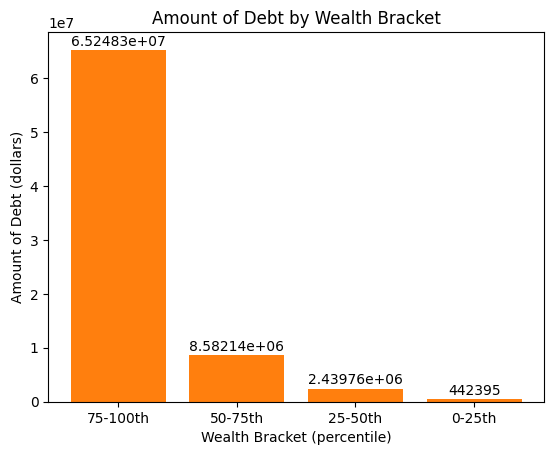

In [45]:
# graph amount of debt held by each wealth bracket 
import matplotlib.pyplot as plt
plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], amounts)

# add labels 
plt.xlabel("Wealth Bracket (percentile)")
plt.ylabel("Amount of Debt (dollars)")
plt.bar_label(plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], amounts), padding=1)
plt.title("Amount of Debt by Wealth Bracket")
plt.savefig("analysis/debt_by_wealth_bracket.png")
plt.show()

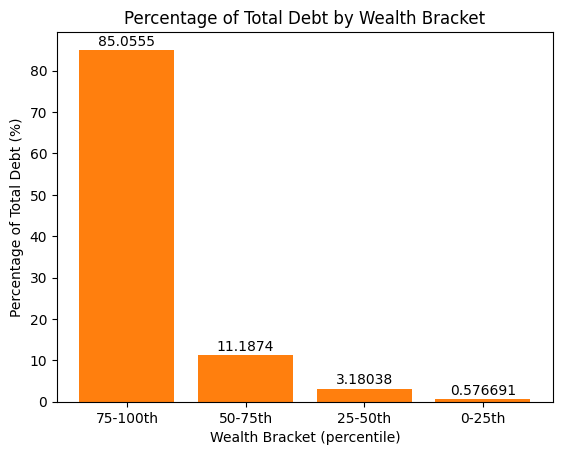

In [49]:
# calculate percentage of total wealth each bracket holds 
total_amt = agg_debt["amount_total"].sum() 
percentages = [((amounts[i] / total_amt) * 100) for i in range(4)] 

# graph percentages # add labels 
plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages)
plt.xlabel("Wealth Bracket (percentile)")
plt.ylabel("Percentage of Total Debt (%)")
plt.bar_label(plt.bar(["75-100th", "50-75th", "25-50th", "0-25th"], percentages), padding=1)
plt.title("Percentage of Total Debt by Wealth Bracket")
plt.savefig("analysis/percent_debt_by_wealth_bracket.png")
plt.show()